In [ ]:
# step - 1 [run this code]
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15502, done.
remote: Total 15502 (delta 0), reused 0 (delta 0), pack-reused 15502
Receiving objects: 100% (15502/15502), 14.17 MiB | 22.99 MiB/s, done.
Resolving deltas: 100% (10405/10405), done.


In [ ]:
# step - 2 [all previous codes run first then run this code]
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
# step - 3 [all previous codes run first then run this code]
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0


In [ ]:
# step - 4 [all previous codes run first then run this code]
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [ ]:
# step - 5 [all previous codes run first then run this code]
# uploading google drive files to use
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Mounted at /content/gdrive


In [ ]:
# step - 6 [all previous codes run first then run this code]
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive
%cd darknet

 1234.gdoc
 20190918_213246-1-1.jpg
 20221007_150202.jpg
 20221007_150340.jpg
 20221007_150704.jpg
 20221007_150706.jpg
 20221007_151648.jpg
 20221007_151659.jpg
 20221007_164339.jpg
 20221007_164349.jpg
 20221007_164438.jpg
 20221007_164931.jpg
 20221007_164957.jpg
 20221007_165035.jpg
 20221007_165142.jpg
 20221007_165737.jpg
'Analysis of spreading fake news on social media or any other platform.gsheet'
 AndroidProject.gslides
 Assingment-171-15-1380.pdf
 Attendance.gsheet
'Azizul 171-15-1380(3).pdf'
'Azizul 171-15-1380.pdf'
'Azizul_cv (1).docx'
'Azizul_cv (2).docx'
 Azizul_cv.docx
 Azizul-CV.docx
 Azizul-CV.pdf
'Azizul Islam.mp4'
 Classroom
'Colab Notebooks'
 Compiler_assign.gdoc
'Compiler Assign..gdoc'
 CSE-421-PC-E-171-15-1380-Final.pdf
'CSE-444_ID-171-15-1380_PC-E (1).docx'
 CSE-444_ID-171-15-1380_PC-E.docx
'CSE-444-PC-E-171-15-1380-Azizul Islam.pdf'
 Cse450-PC-E-171-15-1380-mid.pdf
 dm_final_revised.zip
'DS Asaign.4.pdf'
'Electrical Circuit Assign..pdf'
'Electrical  Ckt. Assing.

In [ ]:
# step - 7 [ready your custom dataset and move your custom dataset into your cloud VM, then run this code]
# this is where my zip is stored (I created a yolov3_random folder where I will get my required files from)
!ls /mydrive/yolov3_final

 backup		       generate_train.py   obj.names	   test.zip
' Final_Train.ipynb'   image		   obj.zip	   yolov3_custom.cfg
 generate_test.py      obj.data		   previous_data


In [ ]:
# step - 8 [all previous codes run first then run this code]
# copy the .zip file into the root directory of cloud VM
!cp /mydrive/yolov3_final/obj.zip ../
!cp /mydrive/yolov3_final/test.zip ../

In [ ]:
# step - 9 [all previous codes run first then run this code]
# unzip the zip file and its contents should now be in /darknet/data/obj
!unzip ../obj.zip -d data/
!unzip ../test.zip -d data/

Archive:  ../obj.zip
  inflating: data/obj/arcia-argentina-demonstrates-escrima-stick-fighting-to-large-group-154687019.jpg  
  inflating: data/obj/arcia-argentina-demonstrates-escrima-stick-fighting-to-large-group-154687019.txt  
  inflating: data/obj/arcia-argentina-demonstrates-escrima-stick-fighting-to-large-group-154687309.jpg  
  inflating: data/obj/arcia-argentina-demonstrates-escrima-stick-fighting-to-large-group-154687309.txt  
  inflating: data/obj/arcia-argentina-demonstrates-escrima-stick-fighting-to-large-group-154687520.jpg  
  inflating: data/obj/arcia-argentina-demonstrates-escrima-stick-fighting-to-large-group-154687520.txt  
  inflating: data/obj/arcia-argentina-demonstrates-escrima-stick-fighting-to-large-group-154687525.jpg  
  inflating: data/obj/arcia-argentina-demonstrates-escrima-stick-fighting-to-large-group-154687525.txt  
  inflating: data/obj/arcia-argentina-demonstrates-escrima-stick-fighting-to-large-group-154687733.jpg  
  inflating: data/obj/arcia-argent

In [ ]:
# step - 10 [all previous codes run first then run this code]
# edit then upload the custom .cfg back to cloud VM from Google Drive
!cp /mydrive/yolov3_final/yolov3_custom.cfg ./cfg

In [ ]:
# step - 11 [all previous codes run first then run this code]
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/yolov3_final/obj.names ./data
!cp /mydrive/yolov3_final/obj.data  ./data

In [ ]:
# step - 12 [all previous codes run first then run this code]
# upload the generate_train.py script to cloud VM from Google Drive
!cp /mydrive/yolov3_final/generate_train.py ./
!cp /mydrive/yolov3_final/generate_test.py ./

In [ ]:
# step - 13 [all previous codes run first then run this code]
# run the python script to do all the work for us
!python generate_train.py
!python generate_test.py

In [ ]:
# step - 14 [all previous codes run first then run this code]
# verify train.txt can be seen in our darknet/data folder
!ls data/

9k.tree     giraffe.jpg		      labels		person.jpg  voc.names
coco9k.map  goal.txt		      obj		scream.jpg
coco.names  horses.jpg		      obj.data		test
dog.jpg     imagenet.labels.list      obj.names		test.txt
eagle.jpg   imagenet.shortnames.list  openimages.names	train.txt


In [ ]:
# step - 15 [all previous codes run first then run this code]
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

--2022-12-07 07:05:32--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2022-12-07 07:05:33--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   102MB/s    in 1.5s    

2022-12-07 07:05:34 (102 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
# step - 16 [all previous codes run first then run this code]
# train your custom detector
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show -map

 CUDA-version: 11020 (11020), cuDNN: 8.1.1, GPU count: 1  
 OpenCV version: 3.2.0
 Prepare additional network for mAP calculation...
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
^C


In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3_final/backup/yolov3_custom_last.weights -dont_show -map

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 134012, rewritten_bbox = 0.047757 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.883841), count: 5, class_loss = 0.000527, iou_loss = 0.058914, total_loss = 0.059441 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 134017, rewritten_bbox = 0.047755 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.875549), count: 4, class_loss = 0.096864, iou_loss = 0.076517, total_loss = 0.173381 
v3 (m

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [ ]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
%cd ..

/content/darknet/cfg
/content/darknet


 CUDA-version: 11020 (11020), cuDNN: 8.1.1, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

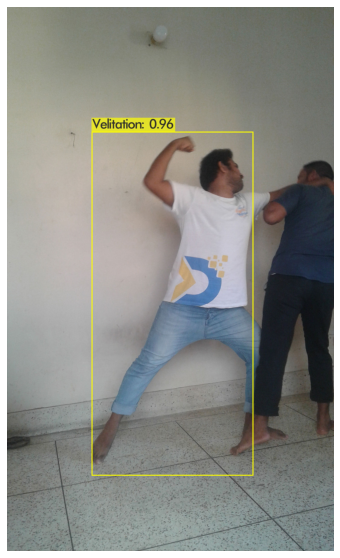

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3_final/backup/yolov3_custom_last.weights /mydrive/yolov3_final/image/image2/test2.jpg -thresh 0.3
imShow('predictions.jpg')

In [ ]:
!./darknet detector map data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3_final/backup/yolov3_custom_last.weights

 CUDA-version: 11020 (11020), cuDNN: 8.1.1, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  